# Explaining Machine Learning Models

## Overview

- Fit an LogisticRegression and RandomForest for the titanic dataset.

- Discuss 3 different methods for interpreting the models' results and what features it used to make its predictions. 
    - Permutation Importance
    - Using `SHAP` and Shapely Values
    - Using `LIME`

## Notebook Headers for Study Group

- ⭐️**EXPLAINING MACHINE LEARNING MODELS**⭐️
    - All of today's content.
-  📚**Shap Resources**
    - Collection of Videos, Book Excerpts, and Blogs.

___

# Imports and Functions

In [1]:
## Import pd, sns, plt, np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE,SMOTENC


## Models & Utils
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from time import time

In [3]:
# ## Changing Pandas Options to see full columns in previews and info
n=200
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
# pd.set_option('display.float_format',lambda x: f"{x:.2f}")

### Modeling Functionx (WIP)_

In [4]:
# !pip install tzlocal

In [5]:
## Adding folder above to path
import os, sys
sys.path.append(os.path.abspath('../'))

## Load stack_functions with autoreload turned on
%load_ext autoreload
%autoreload 2
from CODE import project_functions as pf

def show_code(function):
    import inspect 
    from IPython.display import display,Markdown, display_markdown
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))

In [6]:
# %load_ext autoreload
# %autoreload 2



## Preprocessing

In [7]:
# df = pd.read_csv('https://raw.githubusercontent.com/jirvingphd/dsc-phase-3-project/main/data/drug_use_renamed_converted.csv')#'data/drug_use_renamed_converted.csv')
# df

In [8]:
fname = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR9Yhcch85ziIad4CyZQqLtYijHgsuENLfyC0YAXlajVbSC7U7s3CUUsfG-OYIKOjTI9DdKZH1xMs3a/pub?output=csv'
# df.to_csv(fname,compression='gzip',index=False)
df= pd.read_csv(fname,index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Survived  int64  
 1   Pclass    int64  
 2   Name      object 
 3   Sex       object 
 4   Age       float64
 5   SibSp     int64  
 6   Parch     int64  
 7   Ticket    object 
 8   Fare      float64
 9   Cabin     object 
 10  Embarked  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
df['Name'].apply(lambda x: x.split(',')[0]).value_counts()#.head(50)

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Name, Length: 667, dtype: int64

### Identifying Columns for Preprocessing

In [11]:
## dropping column that are not helpful
bad_cols = ['Name','Ticket']
df.drop(columns=bad_cols,inplace=True)

In [12]:
object_cols = list(df.drop(columns='Survived').select_dtypes('object').columns)
object_cols

['Sex', 'Cabin', 'Embarked']

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

## Feature Engineering

In [16]:
#?You 

# Preprocessing

In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


In [18]:
## Specifying root names of types of features to loop through and filter out from df
target_col = 'Survived'
drop_cols = ['Cabin']

y = df[target_col].copy()
X = df.drop(columns=[target_col,*drop_cols]).copy()
y.value_counts(1,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=321)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
255,3,female,41.00,0,2,20.2125,S
470,3,female,0.75,2,1,19.2583,C
813,2,male,35.00,0,0,10.5000,S
298,1,female,2.00,1,2,151.5500,S
82,3,male,29.00,0,0,9.5000,S
...,...,...,...,...,...,...,...
713,1,male,48.00,1,0,52.0000,S
810,1,female,33.00,1,0,53.1000,S
800,3,female,30.00,1,1,24.1500,S


In [20]:
from sklearn import set_config
set_config(display='diagram')

In [21]:
## saving list of numeric vs categorical feature
num_cols = list(X_train.select_dtypes('number').columns)
cat_cols = list(X_train.select_dtypes('object').columns)

## create pipelines and column transformer
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())#MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore',
                             drop='first')#,
#                              min_frequency=2)
    )])

print('# of num_cols:',len(num_cols))
print('# of cat_cols:',len(cat_cols))

# of num_cols: 5
# of cat_cols: 2


In [22]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)], verbose_feature_names_out=False)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'Embarked'])],
                  verbose_feature_names_out=False)

In [23]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
## Transform X_traian,X_test and remake dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=feature_names)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=feature_names)
X_train_df

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_MISSING,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
255,0.827283,0.883963,-0.449355,2.332612,-0.236040,0.0,0.0,0.0,1.0
470,0.827283,-2.332883,1.337367,0.940132,-0.255202,0.0,0.0,0.0,0.0
813,-0.371470,0.404433,-0.449355,-0.452347,-0.431083,1.0,0.0,0.0,1.0
298,-1.570222,-2.232981,0.444006,2.332612,2.401428,0.0,0.0,0.0,1.0
82,0.827283,-0.075096,-0.449355,-0.452347,-0.451165,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
713,-1.570222,1.443415,0.444006,-0.452347,0.402304,1.0,0.0,0.0,1.0
810,-1.570222,0.244590,0.444006,-0.452347,0.424393,0.0,0.0,0.0,1.0
800,0.827283,0.004825,0.444006,0.940132,-0.156969,0.0,0.0,0.0,1.0


In [24]:
# ## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
# preprocessor.fit(X_train)

# ## Use the encoder's .get_feature_names
# cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder']\
#                             .get_feature_names(cat_cols))
# X_cols = num_cols+cat_features

In [25]:
# ## Transform X_traian,X_test and remake dfs
# X_train_df = pd.DataFrame(preprocessor.transform(X_train),
#                           index=X_train.index, columns=X_cols)
# X_test_df = pd.DataFrame(preprocessor.transform(X_test),
#                           index=X_test.index, columns=X_cols)

# ## Tranform X_train and X_test and make into DataFrames
# X_train_df

In [26]:
y.value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## Resampling with SMOTENC

In [27]:
# y_train.value_counts(1)

In [28]:
# ## Save list of trues and falses for each cols
# smote_feats = [False]*len(num_cols) +[True]*len(cat_features)
# # smote_feats

In [29]:
# ## resample training data
# smote = SMOTENC(smote_feats)
# X_train_sm,y_train_sm = smote.fit_resample(X_train_df,y_train)
# y_train_sm.value_counts()

# MODELING

#### Setting `train_test_list`

In [30]:
### SAVING XY DATA TO LIST TO UNPACK
train_test_list = [X_train_df,y_train, X_test_df,y_test]

## Linear SVC

[i] Training started at 06/23/22-17:01:56:
	Training time was 0.0028 seconds.

           Train  Test  Difference
accuracy    0.8  0.82       -0.02 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.81      0.73      0.77        93

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


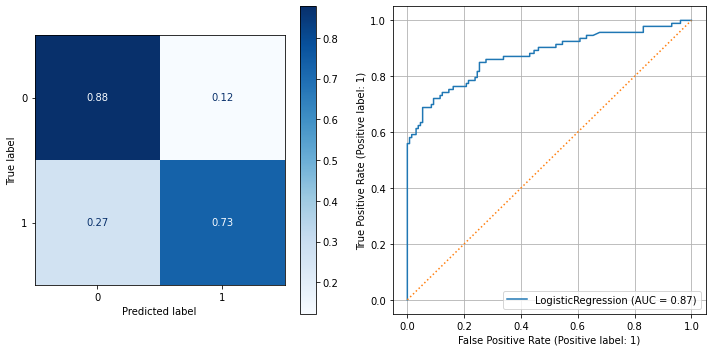

LogisticRegression()

In [31]:
logreg = LogisticRegression()#kernel='linear',C=1)
pf.fit_and_time_model(logreg,*train_test_list)

## RandomForest

[i] Training started at 06/23/22-17:01:56:
	Training time was 0.0715 seconds.

           Train  Test  Difference
accuracy   0.98  0.87        0.12 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       130
           1       0.83      0.85      0.84        93

    accuracy                           0.87       223
   macro avg       0.86      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


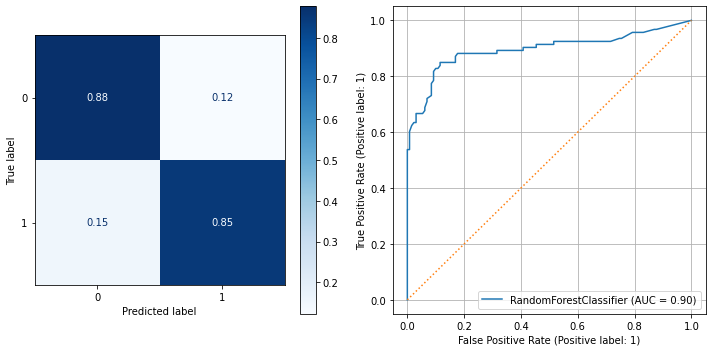

RandomForestClassifier()

In [32]:
rf = RandomForestClassifier()
pf.fit_and_time_model(rf,*train_test_list)

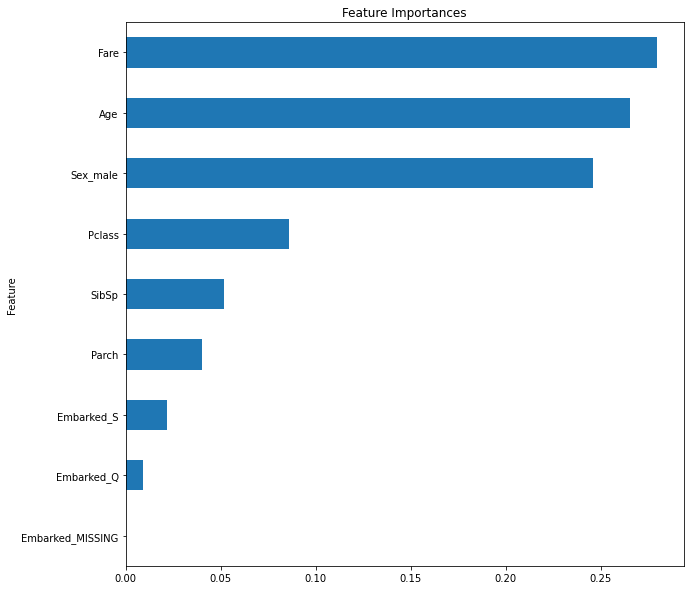

In [33]:
pf.get_importance(rf,X_test_df);

# ⭐️**EXPLAINING MACHINE LEARNING MODELS**⭐️

## Overview

- We will discuss/demo 3 methods of interpreting machine learning models. 
    1. Using Permutation Importance (from scikit-learn)
    2. Using `SHAP` model explainers
    3. Using `LIME` instance explainers

## Permutation Importance

> Permutation Importances will iteratively shuffle the rows of a single feature at a time to asses the model's change in performance with that feature's relationship with the target disrupted. 
- https://scikit-learn.org/stable/modules/permutation_importance.html

```python
from sklearn.inspection import permutation_importance
r = permutation_importance(svc_linear, X_test_df, y_test, n_repeats=30)
r.keys()
```
- Interesting Observation: 
    - permutation_importance takes a `scoring` argument!

> "**Warning Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model.** Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model."

In [34]:
from sklearn.inspection import permutation_importance

In [35]:
## Permutation importance takes a fit mode and test data. 
r = permutation_importance(logreg, X_test_df, y_test,
                           n_repeats=30,scoring='f1')
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [36]:
r['importances_mean']

array([ 8.88665223e-02,  4.00792425e-02,  1.63343701e-02,  9.10510404e-03,
        2.82825247e-03,  2.95998130e-01, -1.73511924e-04, -1.39813388e-03,
        1.59503051e-02])

In [37]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'permutation importance')
permutation_importances

Pclass              0.088867
Age                 0.040079
SibSp               0.016334
Parch               0.009105
Fare                0.002828
Sex_male            0.295998
Embarked_MISSING   -0.000174
Embarked_Q         -0.001398
Embarked_S          0.015950
Name: permutation importance, dtype: float64

In [38]:
r = permutation_importance(rf, X_test_df, y_test, n_repeats=30, scoring='f1')
rf_importances = pd.Series(r['importances_mean'],index=X_test_df.columns,
                          name= 'rf permutation importance')
rf_importances

Pclass              0.137143
Age                 0.115381
SibSp               0.010824
Parch               0.022619
Fare                0.049055
Sex_male            0.252910
Embarked_MISSING    0.000000
Embarked_Q          0.001007
Embarked_S          0.011434
Name: rf permutation importance, dtype: float64

Pclass              0.086120
Age                 0.265219
SibSp               0.051743
Parch               0.039985
Fare                0.279584
Sex_male            0.246145
Embarked_MISSING    0.000108
Embarked_Q          0.009297
Embarked_S          0.021800
Name: rf.feature_importances_, dtype: float64

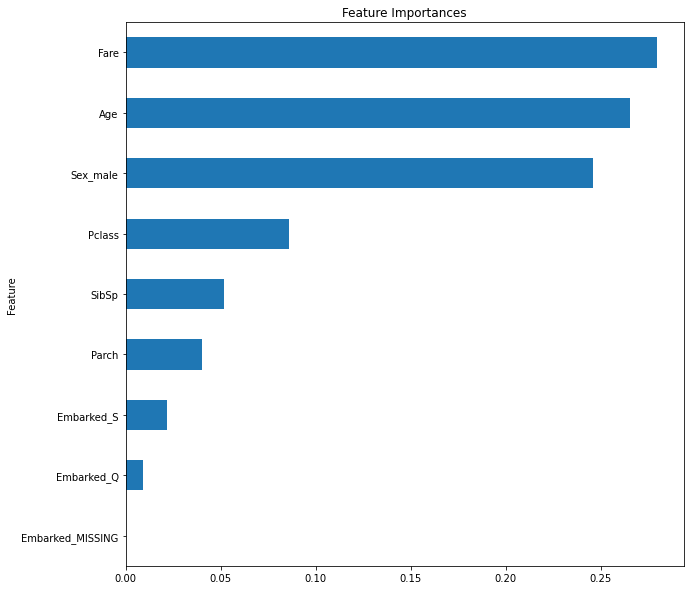

In [39]:
embedded_importances = pf.get_importance(rf,X_test_df)#,plot=False)
embedded_importances.name ='rf.feature_importances_'
embedded_importances

In [40]:
def compare_importances(*importances,sort_index=True,sort_col=0,show_bar=False):
    """Accepts Series of feature importances to concat.
    
    Args:
        *importances (Seires): seires to concat (recommended to pre-set names of Series)
        sort_index (bool, default=True): return series sorted by index. 
                            If False, sort seires by sort_col  #
        sort_col (int, default=0): If sort_index=False, sort df by this column #
        show_bar (bool, default=False): If show_bar, returns a pandas styler instead of df
                                        with the importances plotted as bar graphs
        
    Returns:
        DataFrame: featutre importances     
    
        """
    ## Concat Importances
    compare_importances = pd.concat(importances,axis=1)
    
    ## Sort DF by index or by sort_col
    if sort_index:
        compare_importances = compare_importances.sort_index()
    else:
        sort_col_name = compare_importances.columns[sort_col]
        compare_importances= compare_importances.sort_values(sort_col_name,ascending=False)
        
    ## If show bar, return pandas styler with in-cell bargraphs
    if show_bar:
        return compare_importances.style.bar().set_caption('Feature Importances')
    else:
        return compare_importances

In [41]:
## Compare embedded feature importance vs permutation importance
comp = compare_importances(embedded_importances,rf_importances,#svc_importances,
                          show_bar=True,sort_index=False,sort_col=0)
comp

,rf.feature_importances_,rf permutation importance
Fare,0.279584,0.049055
Age,0.265219,0.115381
Sex_male,0.246145,0.252910
Pclass,0.086120,0.137143
SibSp,0.051743,0.010824
Parch,0.039985,0.022619
Embarked_S,0.021800,0.011434
Embarked_Q,0.009297,0.001007
Embarked_MISSING,0.000108,0.000000


In [42]:
# df['']

In [43]:
## Compare embedded feature importance vs permutation importance
comp = compare_importances(embedded_importances,permutation_importances,
                          show_bar=True,sort_col=-1,sort_index=False)
comp

,rf.feature_importances_,permutation importance
Sex_male,0.246145,0.295998
Pclass,0.086120,0.088867
Age,0.265219,0.040079
SibSp,0.051743,0.016334
Embarked_S,0.021800,0.015950
Parch,0.039985,0.009105
Fare,0.279584,0.002828
Embarked_MISSING,0.000108,-0.000174
Embarked_Q,0.009297,-0.001398


## Using SHAP and Shapely Values for Model Interpretation

###  📚**Shap Resources**

>- SHAP (SHapley Additive exPlanations)) 
    - [Repository](https://github.com/slundberg/shap)
    - [Documentation](https://shap.readthedocs.io/en/latest/?badge=latest)
        - Install via pip or conda.
  

- SHAP uses game theory to calcualte Shapely values for each feature in the dataset. 
- Shapely values are calculated by iteratively testing each feature's contribution to the model by comparing the model's  performance with vs. without the feature. (The "marginal contribution" of the feature to the model's performance).



#### Papers, Book Excerpts, and  Blogs
- [White Paper on Shapely Values](https://arxiv.org/abs/1705.07874)
    
- [Intepretable Machine Learning Book - Section on SHAP](https://christophm.github.io/interpretable-ml-book/shap.html)
    
- Towards Data Science Blog Posts:
    - [Explain Your Model with SHAP Values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

    - [Explain Any Model with SHAP KernelExplaibner](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)





#### Videos/Talks:
- Explaining Machine Learning Models (in general).
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
- Understanding Shapely/SHAP Values:
    - [AI Simplified: SHAP Values in Machine Learning ](https://youtu.be/Tg8aPwPPJ9c)- (Intuitive Explanation)
    - [Explainable AI explained! | #4 SHAP  ](https://youtu.be/9haIOplEIGM)- (Math Calculation Explanation)


### How to Use SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        


- Import and initialize javascript:

```python
import shap 
shap.initjs()
```

In [44]:
# !pip install shap

In [45]:
import shap 
print(shap.__version__)
shap.initjs()

0.41.0


[i] Training started at 06/23/22-17:01:59:
	Training time was 0.0681 seconds.

           Train  Test  Difference
accuracy   0.98  0.87        0.11 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       130
           1       0.86      0.84      0.85        93

    accuracy                           0.87       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.87      0.87      0.87       223



Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


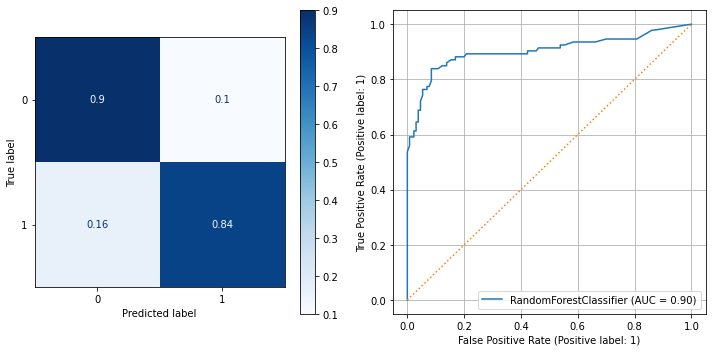

RandomForestClassifier()

In [46]:
rf = RandomForestClassifier()
pf.fit_and_time_model(rf,*train_test_list)

### To Get Expanations for Trees:



1. Create a shap explainer using your fit model.

```python
explainer = shap.TreeExplainer(xgb_clf)
```

2. Get shapely values from explainer for your training data

```python
shap_values = explainer.shap_values(X_train,y_train)
```            

3. Select which type of the available plots you'd like to visualize

    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data
    
  

In [47]:
# importances = pf.get_importance(rf,X_train_df,top_n=30)

In [48]:
## Initialize an explainer with the model
explainer = shap.TreeExplainer(rf)

## Calculaate shap values for test data
shap_values = explainer.shap_values(X_test_df,y_test)
len(shap_values)

2

In [49]:
shap_values[1].shape, X_test_df.shape

((223, 9), (223, 9))

### Summary Plot

```python
## For normal bar graph of importance:
shap.summary_plot(shap_values[1],X_train,plot_type='bar')

## For detail Shapely value visuals:
shap.summary_plot(shap_values, X_train)
```
  

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


>- **IMPORTANT NOTE:** You may need to slice out the correct shap_values for the target class. (by default explainer.shap_values seems to return a list for a binary classification, one set of shap values for each class).
    - This will cause issues like the summary plot having a bar with an equal amount of blue and red for each class. 
    - To fix, slice out the correct matrix from shap_values [0,1]


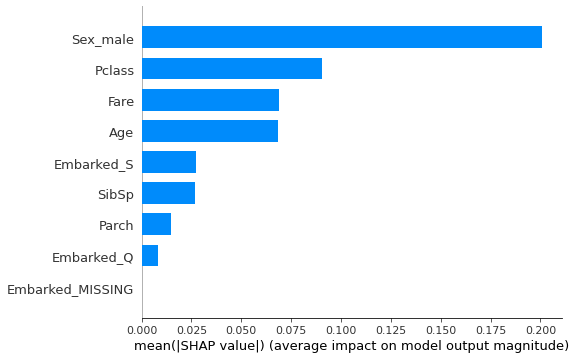

In [50]:
shap.summary_plot(shap_values[1], X_test_df,plot_type='bar',max_display=40)

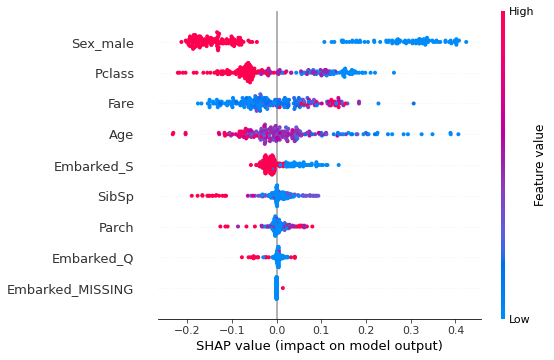

In [51]:
shap.summary_plot(shap_values[1],X_test_df,max_display=40)

# Bookmark 06/03/22

### Force Plots

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row
row = np.random.choice(range(len(X_train)))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
```

#### Explain Individual Plot

In [52]:
target_lookup = {0:'Died',1:'Survived'}
target_lookup[0]

'Died'

In [53]:
## sandomly select a sample of 1 from test data
row = np.random.choice(range(len(X_test_df)))
print(f"- Row #: {row}")

## Get y-value for selected row
class_ = target_lookup[y_test.iloc[row]]
print(f"- Class = {class_}")
sample = X_test_df.iloc[row]#.round(2)
sample

- Row #: 179
- Class = Died


Pclass              0.827283
Age                -0.794391
SibSp              -0.449355
Parch              -0.452347
Fare               -0.444220
Sex_male            1.000000
Embarked_MISSING    0.000000
Embarked_Q          0.000000
Embarked_S          1.000000
Name: 877, dtype: float64

In [54]:
sample.loc[num_cols]

Pclass    0.827283
Age      -0.794391
SibSp    -0.449355
Parch    -0.452347
Fare     -0.444220
Name: 877, dtype: float64

In [55]:
## reshaping numeric cols so can inverse transform
sample_num = sample.loc[num_cols].values.reshape(1,-1)

In [56]:
##  Our scaler
scaler = preprocessor.named_transformers_['num'][-1]
scaler

StandardScaler()

In [57]:
## Inverse transform and make into a datafarme
sample_inv = pd.DataFrame(scaler.inverse_transform(sample_num),
          columns=num_cols,index=[row])
sample_inv.insert(0,'Target',class_)
sample_inv

,Target,Pclass,Age,SibSp,Parch,Fare
179,Died,3.0,20.0,0.0,0.0,9.8458


In [58]:
##  Our encoder
encoder = preprocessor.named_transformers_['cat'][-1]
encoder

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [59]:
## Getting final OHE column names
cat_features = encoder.get_feature_names_out(cat_cols)
cat_features

array(['Sex_male', 'Embarked_MISSING', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [60]:
sample[cat_features].to_frame(row).T

,Sex_male,Embarked_MISSING,Embarked_Q,Embarked_S
179,1.0,0.0,0.0,1.0


In [61]:
## Concat with the categorical features
sample_df = pd.concat([sample_inv,sample[cat_features].to_frame(row).T],axis=1)
sample_df

,Target,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_MISSING,Embarked_Q,Embarked_S
179,Died,3.0,20.0,0.0,0.0,9.8458,1.0,0.0,0.0,1.0


In [62]:
## Individual forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1][row],X_test_df.iloc[row])       

In [63]:
## Trying to find num_cols and cat_cols in the preprocessor
params = preprocessor.get_params()
[print(f"- {k}") for k in params.keys()];

- n_jobs
- remainder
- sparse_threshold
- transformer_weights
- transformers
- verbose
- verbose_feature_names_out
- num
- cat
- num__memory
- num__steps
- num__verbose
- num__imputer
- num__scale
- num__imputer__add_indicator
- num__imputer__copy
- num__imputer__fill_value
- num__imputer__missing_values
- num__imputer__strategy
- num__imputer__verbose
- num__scale__copy
- num__scale__with_mean
- num__scale__with_std
- cat__memory
- cat__steps
- cat__verbose
- cat__imputer
- cat__encoder
- cat__imputer__add_indicator
- cat__imputer__copy
- cat__imputer__fill_value
- cat__imputer__missing_values
- cat__imputer__strategy
- cat__imputer__verbose
- cat__encoder__categories
- cat__encoder__drop
- cat__encoder__dtype
- cat__encoder__handle_unknown
- cat__encoder__max_categories
- cat__encoder__min_frequency
- cat__encoder__sparse


In [64]:
## slice out first transformer pipeline
preprocessor.transformers_[0]

('num',
 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scale', StandardScaler())]),
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [65]:
## list of features is final element in pipeline
preprocessor.transformers_[0][-1]

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [66]:
preprocessor.transformers_

[('num',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('scale', StandardScaler())]),
  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
 ('cat',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='MISSING', strategy='constant')),
                  ('encoder',
                   OneHotEncoder(drop='first', handle_unknown='ignore',
                                 sparse=False))]),
  ['Sex', 'Embarked'])]

In [67]:
# pararms

In [68]:
# params['cat']t

In [69]:
## testing function code
num_pipe_name = 'num'
num_pipe_idx = [i for i,pipe in enumerate(preprocessor.transformers_) if pipe[0]==num_pipe_name]
num_pipe_idx

[0]

In [70]:
num_pipe = preprocessor.transformers_[num_pipe_idx[0]]
num_pipe[-1]

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [71]:
preprocessor.named_transformers_['num']

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())])

In [72]:
sample.to_frame().T

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_MISSING,Embarked_Q,Embarked_S
877,0.827283,-0.794391,-0.449355,-0.452347,-0.44422,1.0,0.0,0.0,1.0


In [73]:
## Putting it all together

def get_sample_row(X_test_df,y_test, preprocessor, row=None, inverse_tf = True,
                   target_lookup = {0:'Died',1:'Survived'}, 
                   num_pipe_name = 'num', cat_pipe_name='cat', 
                   use_orig_index = False, class_pos = -1,
                  as_index=False):
    """Extracts a single row as a new dataframe to compare to shap force plot"""
    
    if row is None:
        if use_orig_index==False:
            ## sandomly select a sample of 1 from test data
            row = np.random.choice(range(len(X_test_df)))
            ## Get y-value for selected row
            class_ = target_lookup[y_test.iloc[row]]
            sample = X_test_df.iloc[row]
            ## save final index name
            row_num = row
            idx_name ='row #'
        else: 
            row = np.random.choice(X_test_df.index)
            ## Get y-value for selected index
            class_ = target_lookup[y_test.loc[row]]
            sample = X_test_df.loc[row]
            row_num = X_test_df.index.get_loc(row)
            idx_name = 'idx'
            
    print(f"- Row #: {row}")
    print(f"- Class = {class_}")


    if inverse_tf==True:
        ## Saving numeric pipeline vars

        ## find the numeric transformer in preprocessor.TRANSFORMERS_ (not named)
        tfs = preprocessor.transformers_
        num_pipe_idx = [i for i,pipe in enumerate(tfs) if pipe[0]==num_pipe_name]
        num_pipe = preprocessor.transformers_[num_pipe_idx[0]]

        ## Grabbing the last item in the actual pipeline (index=1)
        scaler = num_pipe[1][-1]
        num_cols = num_pipe[-1]

        ## Get the individual sample's num values to inv_tf
        sample_num = sample.loc[num_cols].values.reshape(1,-1)


        ## Inverse transform and make into a datafarme
        sample_inv = pd.DataFrame(scaler.inverse_transform(sample_num),
                  columns=num_cols,index=[row])
        sample_inv.insert(0,'Target',class_)

        ## Saving needed info from cat pipeline
        cat_pipe_idx = [i for i,pipe in enumerate(tfs) if pipe[0]==cat_pipe_name]
        cat_pipe = preprocessor.transformers_[cat_pipe_idx[0]]

        encoder = cat_pipe[1][-1]
        cat_cols = cat_pipe[-1]
        cat_features = encoder.get_feature_names_out(cat_cols)


        ## Inverse transform and make into a dataframe
        sample_inv = pd.DataFrame(scaler.inverse_transform(sample_num),
                  columns=num_cols,index=[row])
            ## Concat with the categorical features
        sample_df = pd.concat([sample_inv,
                               sample[cat_features].to_frame(row).T],axis=1)
    else:
        sample_df = sample.to_frame().T
        
    ## insert class and add index name
    if class_pos==-1:
        class_pos = len(sample_df.columns)
    sample_df.insert(class_pos,'Target',class_)
    
    ## Insert index/row
    sample_df.index.name = idx_name
    
    if use_orig_index==True:
        sample_df.insert(0,'row #',row_num)
    else:
        sample_df.insert(0,'idx',X_test_df.index[row_num])

    if as_index:
        return sample_df
    else:
        return sample_df.reset_index()

In [74]:
sample_df = get_sample_row(X_test_df, y_test,preprocessor, use_orig_index=True)
sample_df

- Row #: 176
- Class = Died


,idx,row #,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_MISSING,Embarked_Q,Embarked_S,Target
0,176,77,3.0,18.0,1.0,1.0,7.8542,1.0,0.0,0.0,1.0,Died


In [75]:
sample_df = get_sample_row(X_test_df, y_test,preprocessor, use_orig_index=False)
sample_df

- Row #: 130
- Class = Survived


,row #,idx,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_MISSING,Embarked_Q,Embarked_S,Target
0,130,269,1.0,58.0,0.0,1.0,153.4625,0.0,0.0,0.0,1.0,Survived


In [76]:
## Individual forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_df['row #']],X_test_df.iloc[sample_df['row #']])       

In [77]:
def get_sample_show_forceplot(X_test_df,y_test,preprocessor,  row=None, 
                              inverse_tf = True, 
                              target_lookup = {0:'Died',1:'Survived'}, 
                              num_pipe_name = 'num', cat_pipe_name='cat', 
                              use_orig_index = False, class_pos = -1,
                              as_index=False):
    sample_df = get_sample_row(X_test_df, y_test,preprocessor, row=row, 
                               inverse_tf=inverse_tf,target_lookup=target_lookup,
                               num_pipe_name=num_pipe_name, 
                               cat_pipe_name=cat_pipe_name, 
                               use_orig_index=use_orig_index, class_pos=class_pos,
                              as_index=as_index)
    ## Individual forceplot
    display(sample_df)
    return shap.force_plot(explainer.expected_value[1], shap_values[1][sample_df['row #']],X_test_df.iloc[sample_df['row #']])       

In [78]:
get_sample_show_forceplot(X_test_df,y_test, preprocessor)

- Row #: 23
- Class = Died


,row #,idx,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_MISSING,Embarked_Q,Embarked_S,Target
0,23,525,3.0,28.5,0.0,0.0,7.2292,1.0,0.0,0.0,0.0,Died


### Overall Forceplot

In [79]:
## Overall Forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test_df)       

**`shap.dependence_plot`**


```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

In [80]:
X_test_df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_MISSING', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

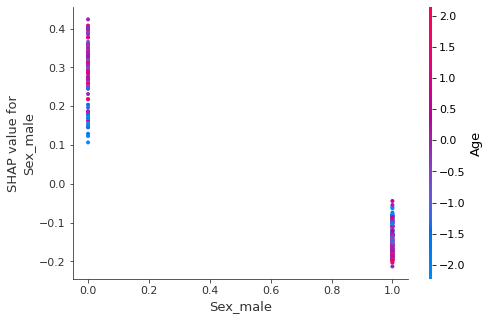

In [81]:
## ERROR WHEN RUNNING DEPENDENCE_PLOT WITHOUT EXPLICITY itneraction_index
## https://stackoverflow.com/questions/70482847/shap-dependence-plot-doesnt-work-with-an-error-which-is-related-deep-inside-th
try:
    shap.dependence_plot('Sex_male',shap_values[1],X_test_df,
                         interaction_index='Age')
except Exception as e:
    print("ERROR! ",e)

- Workaround: manually determining the ideal interaction_index the same way as the function.
`shap.common.approximate_interactions`

From the documentation:
> - interaction_index : "auto", None, int, or string
    - The index of the feature used to color the plot. The name of a feature can also be passed as a string. 
    - If "auto" then shap.common.approximate_interactions is used to pick what seems to be the strongest interaction (note that to find to true stongest interaction you need to compute the SHAP interaction values).

In [82]:
import inspect
from IPython.display import Markdown

md = "```python\n"+inspect.getsource(shap.approximate_interactions)+"\n```"
Markdown(md)

```python
def approximate_interactions(index, shap_values, X, feature_names=None):
    """ Order other features by how much interaction they seem to have with the feature at the given index.

    This just bins the SHAP values for a feature along that feature's value. For true Shapley interaction
    index values for SHAP see the interaction_contribs option implemented in XGBoost.
    """

    # convert from DataFrames if we got any
    if str(type(X)).endswith("'pandas.core.frame.DataFrame'>"):
        if feature_names is None:
            feature_names = X.columns
        X = X.values

    index = convert_name(index, shap_values, feature_names)

    if X.shape[0] > 10000:
        a = np.arange(X.shape[0])
        np.random.shuffle(a)
        inds = a[:10000]
    else:
        inds = np.arange(X.shape[0])

    x = X[inds, index]
    srt = np.argsort(x)
    shap_ref = shap_values[inds, index]
    shap_ref = shap_ref[srt]
    inc = max(min(int(len(x) / 10.0), 50), 1)
    interactions = []
    for i in range(X.shape[1]):
        encoded_val_other = encode_array_if_needed(X[inds, i][srt], dtype=np.float)

        val_other = encoded_val_other
        v = 0.0
        if not (i == index or np.sum(np.abs(val_other)) < 1e-8):
            for j in range(0, len(x), inc):
                if np.std(val_other[j:j + inc]) > 0 and np.std(shap_ref[j:j + inc]) > 0:
                    v += abs(np.corrcoef(shap_ref[j:j + inc], val_other[j:j + inc])[0, 1])
        val_v = v

        val_other = np.isnan(encoded_val_other)
        v = 0.0
        if not (i == index or np.sum(np.abs(val_other)) < 1e-8):
            for j in range(0, len(x), inc):
                if np.std(val_other[j:j + inc]) > 0 and np.std(shap_ref[j:j + inc]) > 0:
                    v += abs(np.corrcoef(shap_ref[j:j + inc], val_other[j:j + inc])[0, 1])
        nan_v = v

        interactions.append(max(val_v, nan_v))

    return np.argsort(-np.abs(interactions))

```

In [83]:
## manually calculating the strongest feature interactions
# to use as interaction_index for shap.dependence_plot
interactions = shap.approximate_interactions('Age',shap_values[1],X_test_df,
                              feature_names=X_test_df.columns)
interactions

array([8, 2, 5, 4, 0, 3, 7, 6, 1])

In [84]:
X_test_df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_MISSING', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [85]:
 X_test_df.columns[interactions]

Index(['Embarked_S', 'SibSp', 'Sex_male', 'Fare', 'Pclass', 'Parch',
       'Embarked_Q', 'Embarked_MISSING', 'Age'],
      dtype='object')

In [86]:
## save the results in a datframe and add rank column to help sift through
strong_intxn = pd.DataFrame({ "Feature": X_test_df.columns[interactions],
                             'Interaction Index':interactions,
                             'Rank': range(1,len(interactions)+1) ,
                           })
strong_intxn = strong_intxn.set_index('Feature')
strong_intxn

,Interaction Index,Rank
Feature,,
Embarked_S,8,1
SibSp,2,2
Sex_male,5,3
Fare,4,4
Pclass,0,5
Parch,3,6
Embarked_Q,7,7
Embarked_MISSING,6,8
Age,1,9


In [87]:
## what is the smallest value for interaction index
print(strong_intxn['Interaction Index'].idxmin())
strong_intxn['Interaction Index'].idxmax()

Pclass


'Embarked_S'

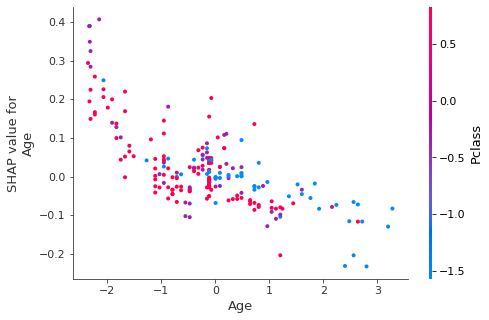

In [88]:
shap.dependence_plot('Age',shap_values[1], features= X_test_df,
                     feature_names=X_test_df.columns,
                     interaction_index= strong_intxn['Interaction Index'].idxmin())

In [89]:
corr_age = X_test_df.corrwith(X_test_df['Age']).to_frame('Corr')
corr_age

,Corr
Pclass,-0.384491
Age,1.000000
SibSp,-0.329501
Parch,-0.215487
Fare,0.153428
Sex_male,-0.040949
Embarked_MISSING,0.159681
Embarked_Q,0.005306
Embarked_S,-0.019388


In [90]:
corr_age['AbsCorr'] = corr_age['Corr'].abs()

<AxesSubplot:>

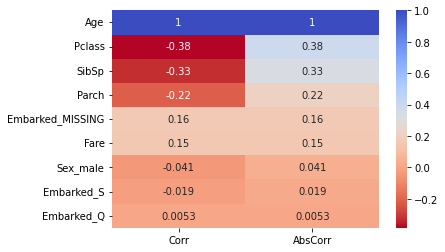

In [91]:
sns.heatmap(corr_age.sort_values('AbsCorr',ascending=False), annot=True, cmap='coolwarm_r')


In [92]:
 strong_intxn['Interaction Index'].idxmin()

'Pclass'

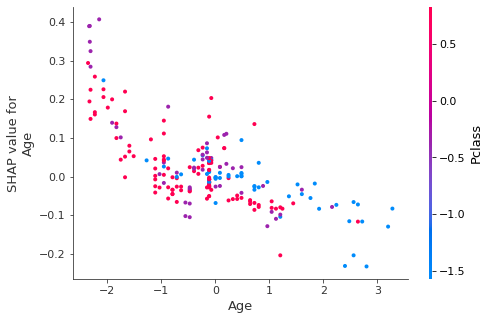

In [93]:
shap.dependence_plot('Age',shap_values[1], features= X_test_df,
                     feature_names=X_test_df.columns,
                     interaction_index='Pclass')

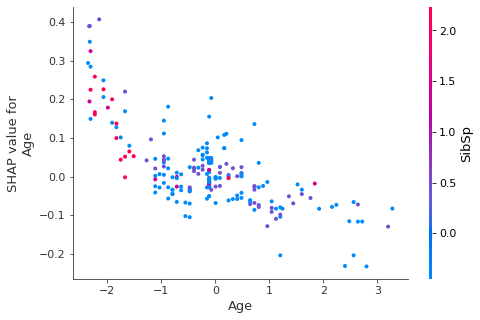

In [94]:
shap.dependence_plot('Age',shap_values[1], features= X_test_df,
                     feature_names=X_test_df.columns,
                     interaction_index='SibSp')

In [95]:
# shap.dependence_plot('Age',shap_values[1], features= X_test_df,
#                      feature_names=X_test_df.columns,
#                      interaction_index= strong_intxn['Interaction Index'].idxmax())

### Trying to Understand the Interaction Values Better (and If I am using them)

- https://towardsdatascience.com/analysing-interactions-with-shap-8c4a2bc11c2a

In [96]:
interaction_vals = explainer.shap_interaction_values(X_test_df)
type(interaction_vals)

list

In [97]:
len(interaction_vals)

2

In [98]:
interaction_vals[1].shape

(223, 9, 9)

In [99]:
X_test_df.shape

(223, 9)

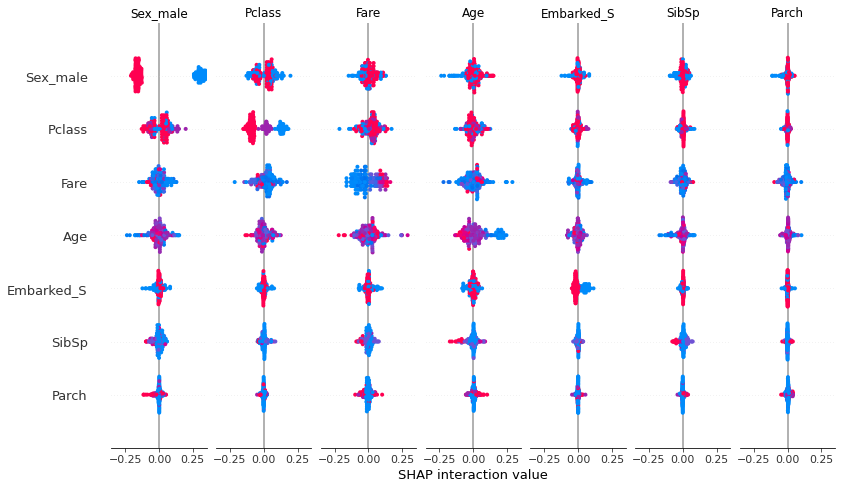

In [100]:
shap.summary_plot(interaction_vals[1], X_test_df)


In [101]:
interaction_vals[1].shape

(223, 9, 9)

In [102]:
interaction_vals[1][0].shape

(9, 9)

In [103]:
# # Source: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Basic%20SHAP%20Interaction%20Value%20Example%20in%20XGBoost.html
# """
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(Xd)
# np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()
# """

# np.abs(shap_values[1].sum(1) + explainer.expected_value - rf.predict(X_test_df)).max()


In [104]:
intxn_vals_survived = interaction_vals[1]
intxn_vals_survived 

array([[[-7.62752655e-02, -8.08599325e-03,  2.96980025e-03, ...,
          4.85189029e-07,  1.63390793e-03, -9.06239233e-03],
        [-8.08599325e-03,  1.34323853e-02,  9.84358611e-04, ...,
         -1.87956207e-07,  5.25609342e-04, -3.10339142e-03],
        [ 2.96980025e-03,  9.84358611e-04,  4.66332696e-03, ...,
         -3.75373168e-06,  6.51893746e-04, -3.22768131e-03],
        ...,
        [ 4.85189029e-07, -1.87956207e-07, -3.75373168e-06, ...,
         -6.37905001e-05,  3.17797775e-06, -5.44066475e-05],
        [ 1.63390793e-03,  5.25609342e-04,  6.51893746e-04, ...,
          3.17797775e-06,  1.28499212e-02,  5.58695487e-03],
        [-9.06239233e-03, -3.10339142e-03, -3.22768131e-03, ...,
         -5.44066475e-05,  5.58695487e-03,  5.83785425e-02]],

       [[ 1.41816647e-02,  1.10151150e-02, -4.49010687e-03, ...,
          1.71462666e-05,  1.22571073e-03,  2.35038529e-03],
        [ 1.10151150e-02, -6.56689954e-02,  1.20916549e-03, ...,
          1.25325703e-05,  2.48476117e

In [105]:
pd.DataFrame(intxn_vals_survived.mean(axis=0),  # axis=1?
             index=X_test_df.columns,
             columns=X_test_df.columns)


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_MISSING,Embarked_Q,Embarked_S
Pclass,-0.013829,0.000503,-0.000251,-0.000197,0.008861,0.005219,1.168993e-05,-1.179022e-04,-0.000802
Age,0.000503,0.015711,-0.002488,0.002760,0.001031,-0.000997,2.214056e-05,-3.127092e-05,-0.000058
SibSp,-0.000251,-0.002488,0.003026,0.000705,-0.000117,-0.000791,1.255581e-05,-7.400151e-05,-0.000083
Parch,-0.000197,0.002760,0.000705,0.004406,-0.002640,-0.001375,3.714809e-06,8.884345e-04,-0.000084
Fare,0.008861,0.001031,-0.000117,-0.002640,-0.011661,-0.000813,-9.194894e-06,2.078436e-05,0.001227
Sex_male,0.005219,-0.000997,-0.000791,-0.001375,-0.000813,0.028398,-1.169575e-05,1.491520e-04,-0.000438
Embarked_MISSING,0.000012,0.000022,0.000013,0.000004,-0.000009,-0.000012,-6.168548e-05,-4.538644e-08,0.000018
Embarked_Q,-0.000118,-0.000031,-0.000074,0.000888,0.000021,0.000149,-4.538644e-08,1.725651e-03,-0.001164
Embarked_S,-0.000802,-0.000058,-0.000083,-0.000084,0.001227,-0.000438,1.803196e-05,-1.163606e-03,0.004551


In [106]:
# shap.dependence_plot('Age',shap_values[1], features= X_test_df,
#                      feature_names=X_test_df.columns,
#                      interaction_index= strong_intxn['Interaction Index'].idxmax())

### Waterfall Plot

In [107]:
# explainer.expected_value

In [108]:
# shap_values

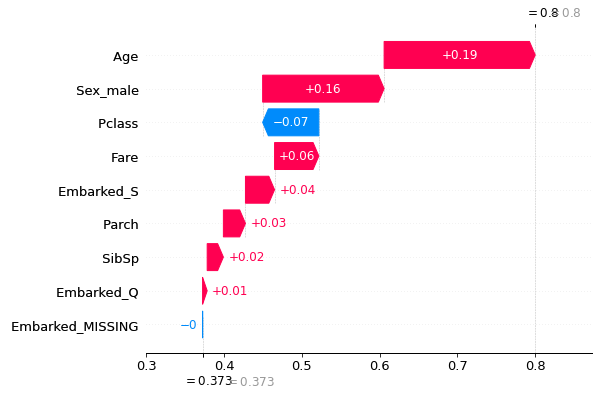

In [109]:
#source: https://towardsdatascience.com/explainable-ai-xai-a-guide-to-7-packages-in-python-to-explain-your-models-932967f0634b
i = 79
## MAKE SURE TO SLICE OUT [1] FROM shap_values and expected_value before slicing out the row
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[1][i], 
                                       features=X_test_df.iloc[i,:], 
                                       feature_names=X_test_df.columns, 
                                       max_display=15, show=True)


## Testing interpretml

In [110]:
# from sklearn.model_selection import train_test_split
# from interpret.glassbox import ExplainableBoostingClassifier
# #the glass box model (using Boosting Classifier)
# ebm = ExplainableBoostingClassifier(random_state=120)
# # titanic = sns.load_dataset('titanic').dropna()
# # #Data splitting
# # X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['survived', 'alive'], axis = 1), 
# #                                                     titanic['survived'], test_size = 0.2, random_state = 121)
# #Model Training
# ebm.fit(X_train_df, y_train)

In [111]:
# shap.summary_plot(shap_values,X_test,plot_type='bar')

## Explaining Models with LIME

>- LIME (Local Interpretable Model-Agnostic Explanations) 
    - GitHub: https://github.com/marcotcr/lime
    - [White Paper](https://arxiv.org/abs/1602.04938)

- [Blog Post:"ExplainYour Modelw ith LIME"](https://medium.com/dataman-in-ai/explain-your-model-with-lime-5a1a5867b423)

In [112]:
# !pip install lime
from lime.lime_tabular import LimeTabularExplainer

In [113]:
lime_explainer =LimeTabularExplainer(
    training_data=np.array(X_test_df),
    feature_names=X_train_df.columns,
    class_names=['Died', 'Survived'],
    mode='classification'
)

In [114]:
row = np.random.choice(range(len(X_test_df)))
print(f"- Row #: {row}")
print(f"Class = {target_lookup[y_test.iloc[row]]}")
# X_test_df.iloc[row].round(2)    

- Row #: 112
Class = Survived


In [115]:
exp = lime_explainer.explain_instance(X_test_df.iloc[row], rf.predict_proba)
exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [116]:
from ipywidgets import interact

@interact
def show_instance(row=(0, len(X_test_df))):
    print(f"- Row #: {row}")
    print(f"Class = {target_lookup[y_test.iloc[row]]}")
    exp = lime_explainer.explain_instance(X_test_df.iloc[row], rf.predict_proba)

    exp.show_in_notebook(show_table=True)
# X_test_df.iloc[row].round(2)    

interactive(children=(IntSlider(value=111, description='row', max=223), Output()), _dom_classes=('widget-inter…